# K Nearest Neighbors Project 

## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [58]:
df = pd.read_csv('KNN_Project_Data', index_col=0)

**Check the head of the dataframe.**

In [59]:
df.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1000 entries, 1636.67061424 to 1287.15002538
Data columns (total 10 columns):
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(9), int64(1)
memory usage: 85.9 KB


In [61]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GWYH,1000.0,991.851567,392.278890,21.72,694.859326,978.355081,1275.528770,2172.0
TRAT,1000.0,1529.373525,640.286092,31.80,1062.600806,1522.507269,1991.128626,3180.0
TLLZ,1000.0,495.107156,142.789188,8.45,401.788135,500.197421,600.525709,845.0
IGGA,1000.0,940.590072,345.923136,17.93,700.763295,939.348662,1182.578166,1793.0
HYKR,1000.0,1550.637455,493.491988,27.93,1219.267077,1564.996551,1891.937040,2793.0
EDFS,1000.0,1561.003252,598.608517,31.96,1132.097865,1565.882879,1981.739411,3196.0
GUUB,1000.0,561.346117,247.357552,13.52,381.704293,540.420379,725.762027,1352.0
MGJM,1000.0,1089.067338,402.666953,23.21,801.849802,1099.087954,1369.923665,2321.0
JHZC,1000.0,1452.521629,568.132005,30.89,1059.499689,1441.554053,1864.405512,3089.0
TARGET CLASS,1000.0,0.500000,0.500250,0.00,0.000000,0.500000,1.000000,1.0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

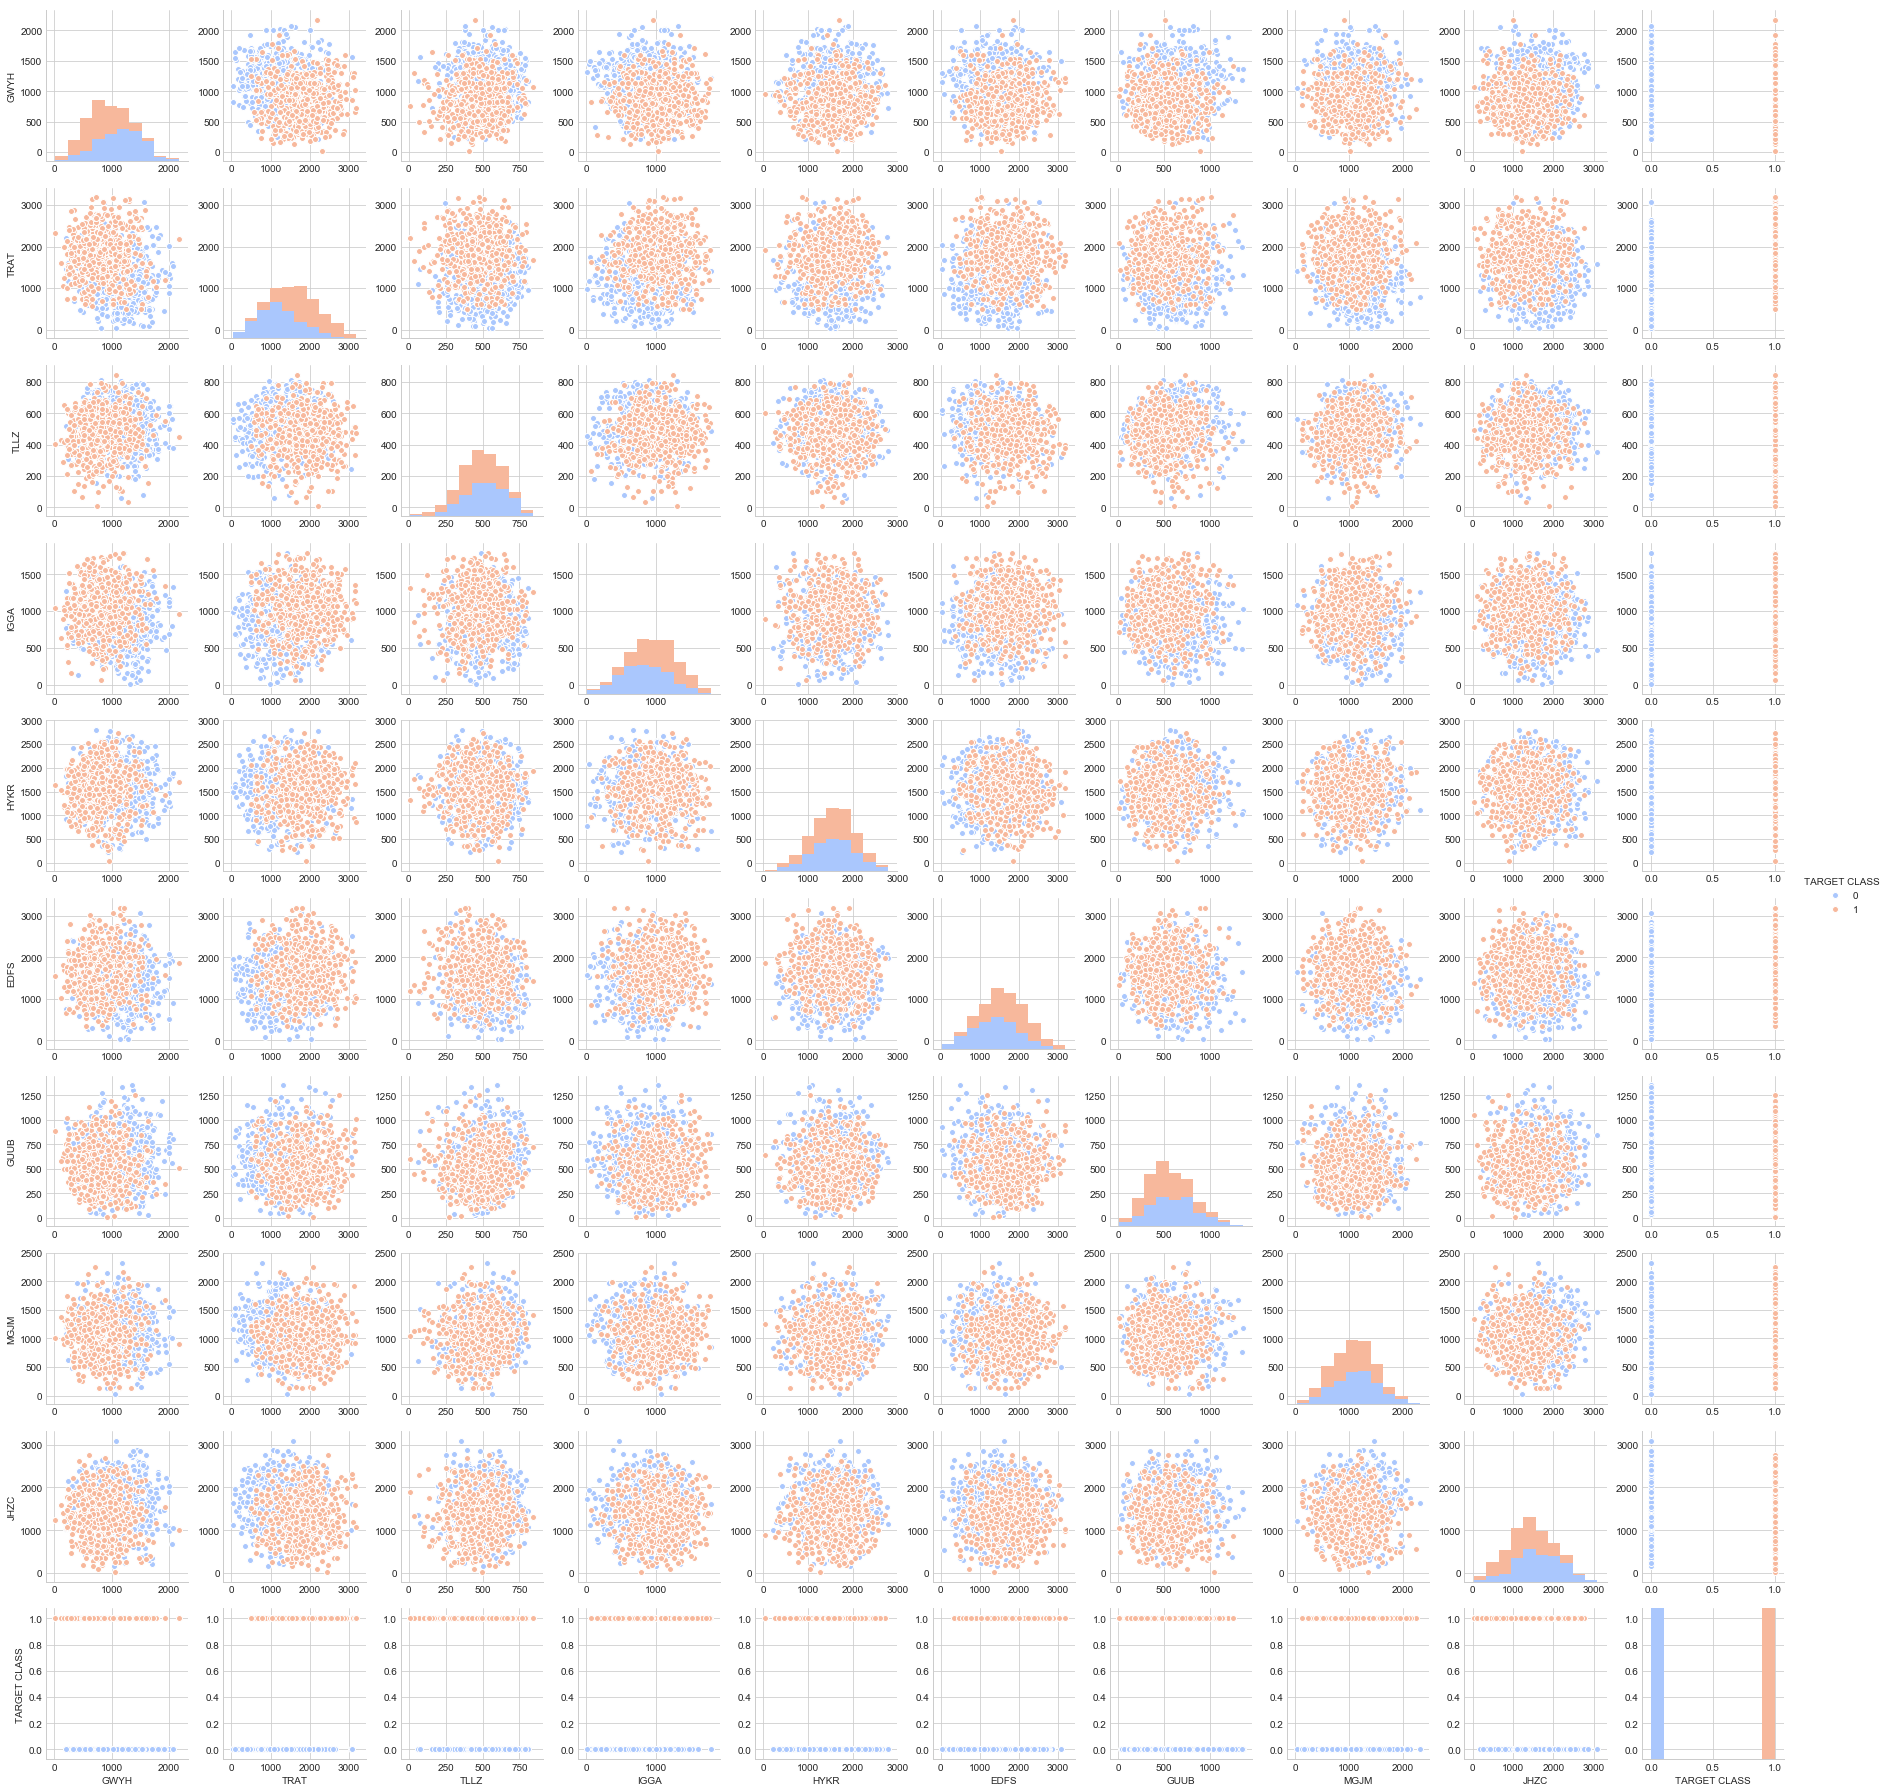

In [62]:
sns.pairplot(df, hue='TARGET CLASS', palette='coolwarm')

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [63]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [64]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [65]:
scaler.fit(df[df.columns[:-1]])

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [66]:
scaled_features = scaler.transform(df[df.columns[:-1]])

In [67]:
scaled_features

array([[-0.44343461,  1.61980773, -0.9582548 , ..., -0.93279392,
         1.00831307, -1.06962723],
       [-1.05657361,  1.7419175 , -1.50422015, ..., -0.46186435,
         0.25832069, -1.04154625],
       [-0.43698145,  0.77579285,  0.21339413, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ..., 
       [-0.97901454,  0.83771499,  0.01401811, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [-0.99239881,  0.0303711 ,  1.06295359, ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.79510909,  1.12180047,  1.18594424, ..., -1.25156478,
        -0.60352946, -0.87985868]])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [68]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

df_feat.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [71]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [72]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [73]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

** Create a confusion matrix and classification report.**

In [75]:
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

             precision    recall  f1-score   support

          0       0.77      0.71      0.74       152
          1       0.72      0.78      0.75       148

avg / total       0.74      0.74      0.74       300

[[108  44]
 [ 33 115]]


# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. **

In [76]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(y_test != pred))

error_rate

[0.25666666666666665,
 0.25,
 0.23666666666666666,
 0.22,
 0.22,
 0.20333333333333334,
 0.22333333333333333,
 0.19333333333333333,
 0.19666666666666666,
 0.20000000000000001,
 0.20000000000000001,
 0.18333333333333332,
 0.19333333333333333,
 0.18666666666666668,
 0.19666666666666666,
 0.18666666666666668,
 0.19333333333333333,
 0.18333333333333332,
 0.17666666666666667,
 0.16666666666666666,
 0.17666666666666667,
 0.16666666666666666,
 0.17333333333333334,
 0.18333333333333332,
 0.17999999999999999,
 0.17000000000000001,
 0.17333333333333334,
 0.16666666666666666,
 0.17333333333333334,
 0.17333333333333334,
 0.16333333333333333,
 0.16666666666666666,
 0.16666666666666666,
 0.15666666666666668,
 0.16333333333333333,
 0.16666666666666666,
 0.17666666666666667,
 0.16666666666666666,
 0.17333333333333334]

**Now create the following plot using the information from your for loop.**

Text(0,0.5,'Error Rate')

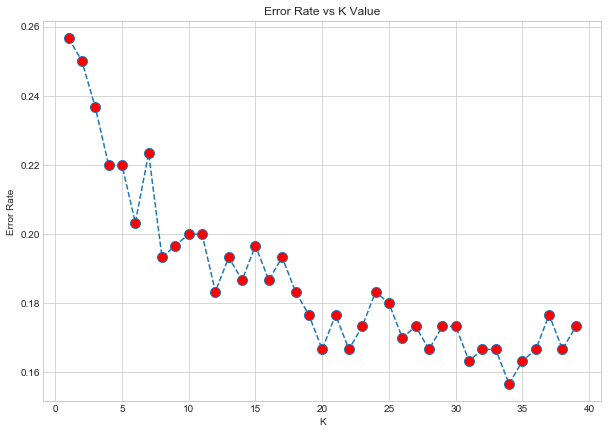

In [77]:
plt.figure(figsize=(10, 7))
plt.plot(range(1,40), error_rate, ls='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [78]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K=12\n')
print('\n', confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


WITH K=12


 [[127  25]
 [ 30 118]]
             precision    recall  f1-score   support

          0       0.81      0.84      0.82       152
          1       0.83      0.80      0.81       148

avg / total       0.82      0.82      0.82       300



In [79]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K=16\n')
print('\n', confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


WITH K=16


 [[125  27]
 [ 29 119]]
             precision    recall  f1-score   support

          0       0.81      0.82      0.82       152
          1       0.82      0.80      0.81       148

avg / total       0.81      0.81      0.81       300



In [80]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K=30\n')
print('\n', confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


WITH K=30


 [[125  27]
 [ 25 123]]
             precision    recall  f1-score   support

          0       0.83      0.82      0.83       152
          1       0.82      0.83      0.83       148

avg / total       0.83      0.83      0.83       300



# Awesome !